<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/Univariate_probability_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
from scipy.stats import bernoulli


Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$

# Probability: Univariate Models
## Basic Probability knowledge
- Denote the joint probability of events $A$ and $B$ as $P(A, B)$. 

- If $A$ and $B$ are independent events, $P(A, B)= P(A)P(B) $. 

- Conditional Probability of event $B$ happening given that $A$ has occurred is defined as 
$$ P(B|A) = \frac{P(A,B)}{P(A)}$$

- Events $A$ and $B$ are **conditional independence** of events given event $C$ if 
$$ P(A, B|C)= P(A|C)P(B|C)$$



- **Bayes' rule:** The formula for computing the probability distribution over possible values of an unknown(hidden) quantity $H$ given some observed data $Y=y$,
$$P(H=h|Y=y) = \frac{p(H=h)p(Y=y|H=h)}{p(Y=y)} $$
It follows from $p(h|y)p(y)=p(h)p(y|h)=p(h,y)$. 
   - $p(H)$: what we know about $H$ before we see any data, **prior distribution**. 
   - $p(Y=y|H=h)$: the possible outcomes $Y$ expect to see if $H=h$, **likelihood**. It is a function of $h$ so it doesn't sum to 1.  
   - $p(H=h|Y=y)$: the new brief state about the possible values of $H$. **posterior distribution**. 

  - **posterior $\propto$ prior $\times$ likelihood** 



### Example: Testing for COVID 
Say you may have contracted COVID-19, You decide to take a diagnostic test, and you want to use its result to
determine if you are infected or not.

Let $H = 1$ be the event that you are infected, and $H = 0$ be the event you are not infected. Let
$Y = 1$ if the test is positive, and $Y = 0$ if the test is negative. The **sensitivity** (aka true positive rate) is defined as
$p(Y = 1|H = 1)$. The **specificity** (aka true negative rate)
is defined as $p(Y = 0|H = 0)$. We set
the sensitivity to 87.5% and the specificity to 97.5%. The quantity $p(H = 1)$ represents the prevalence of the
disease in the area in which you live. We set this to $p(H = 1) = 0.1$ (i.e., 10%).

Now suppose you test positive,
$$ 
\begin{split}
p(H = 1|Y = 1) &= \frac{p(Y = 1|H = 1)p(H=1)}{p(Y = 1|H = 1)p(H=1) + p(Y = 1|H = 0)p(H=0)}  \\ 
&=\frac{0.875 \times 0.1}{0.875\times0.1 + 0.025 \times0.9} = 0.795
\end {split}
$$
There is a 79.5% chance you are infected.

Suppose you test negative, 
$$ 
\begin{split}
p(H = 1|Y = 0) &= \frac{p(Y = 0|H = 1)p(H=1)}{p(Y = 0|H = 1)p(H=1) + p(Y = 0|H = 0)p(H=0)}  \\ 
&=\frac{0.125 \times 0.1}{0.125\times0.1 + 0.975 \times0.9} = 0.014
\end {split}
$$
So there is just a 1.4% chance you are infected.

# Discrete random variable
The state space $\c{X}$ is finite or countable infinite, like $\c{X}=\{1,2,3,4\}$ or $\c{X}=\mb{Z}$. We can define 
probability mass function $p(x)=p(X=x)$.

-  **Marginal distribution:** $p(X=x)= \sum_y p(X=x, Y=y)$. 

- **independent variables**(applies to continuous rv): If $X$ and $Y$ are independent random variable ($X\perp Y$), $p(X, Y)= p(X)p(Y)$. 

- **conditionally independent**(applies to continuous rv): If $X$ and $Y$ are conditionally independent given $Z$ ($X\perp Y | Z$), $p(X, Y|Z)= p(X|Z)p(Y|Z)$. 


## 1. Bernoulli distribution 
Consider toss a coin, where the probability of it lands head is $0\le\theta\le1$. We can denote $Y=1$ as it lands head and denote $Y=0$ that it lands tail. This is **Bernoulli distribution**, $Y\sim \text{Ber}(\theta)$. Note $\sim$ means "is distributed as". The probability mass function is 
$$\text{Ber}(y|\theta)=\begin{cases}1-\theta & \text{if } y =0 \\ \theta & \text{if }y=1 \end{cases}  $$
There is a more concise way to write 

$$\text{Ber}(y|\theta)=\theta^y(1-\theta)^{(1-y)} $$

**If you are given a special coin, how do I find its $\theta$?**
### Modelling coin flips
**Data:** sequence $\c{D}=(H, H, T,H,T)$. You count $k$ heads out of $N$ flips. 

**Assumption:** We flip coin in i.i.d. manner. (independent and identically distributed)

**Calculate likelihood:** 
\begin{align}
P(\c{D}|\theta)&= P(HHTHT|\theta) \\
&= P(H|\theta)P(H|\theta)P(T|\theta)P(H|\theta)P(T|\theta) \\
&=\theta^3(1-\theta)^2
\end{align}
Note it is different from $P(\text{3 heads}|\theta)$. 

In general for $k$ heads out of $N$ clips, the likelihood is 
$$ P(\c{D}|\theta)=\theta^k(1-\theta)^{n-k}.$$

**Maximum likelihood estimator (MLE):** Choose $\theta$ that maximizes the probability of observed data.
\begin{align}
\hat{\theta}_{\text{MLE}} &= \arg\max_\theta P(\c{D}|\theta) \\
&=\arg\max_{\theta} \log P(\c{D}|\theta) \\
&= \arg\max_\theta \log \theta^k (1-\theta)^{N-k} \\
&= \arg\max_\theta \left(k\log(\theta) +(N-k) \log(1-\theta)\right). 
\end{align}

Solve $\frac{d}{d\theta}\log P(\c{D|\theta})=0$ for $\theta$. 
$$ \frac{d}{d\theta}\log P(\c{D|\theta}) = \frac{k}{\theta}-\frac{N-k}{1-\theta}=0$$
$$ \boxed{\hat\theta = \frac{k}{N}}$$


**Question remained:** 
- How good is this MLE?

- If I flipped the coin 20 times and got 12 heads, and I flipped the same coin 200 times and got 110 heads, which one is better? Why?

 

In [ ]:
# Bernoulli Random Variable
# defining a Bernoulli RV X with X=1 having probability of p
p=0.3
X=bernoulli(p)

# drawing 10,000 samples from the random variable X in i.i.d manner. 
X_samples= X.rvs(100)
print(X_samples)


[1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0]


Theoretical p:  0.3
With N= 100 , MLE of p is :  0.29
With N= 1000 , MLE of p is :  0.307
With N= 10000 , MLE of p is :  0.2986
With N= 100000 , MLE of p is :  0.3009
With N= 1000000 , MLE of p is :  0.299871


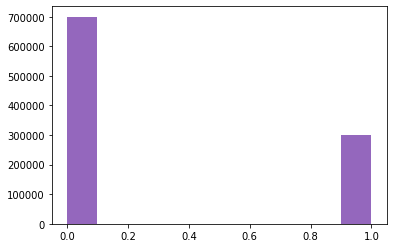

In [ ]:
N_span = [100 ,1000, 10000 ,100000, 1000000]
print('Theoretical p: ', p)

for N in N_span:
  X_samples = X.rvs(N)
  print('With N=',N,', MLE of p is : ', sum(X_samples)/N)
  hist(X_samples)  




## 2. Categorical distribution
Generalize the Bernoulli to $C>2$ labels, $y\in\{1,2,\dots,C\}$. The categorial distribution is 
\begin{align}
\text{Cat}(y|\mm\theta) = \Pi_{c=1}^C\theta_c^{\mb{1}_{(y=c)}}
\end{align}
In other words, $p(y=c|\mm\theta)=\theta_c$. The condition for $\theta_c$ is $0\le \theta_c\le 1$ and $\sum_{c=1}^C\theta_c=1$, then there are only $C-1$ degree of freedoms. 

These labels are actually meaningless since you can replace numbers to colors if you want. 

**Use one-hot vector:** If $C=3$, encode the class $y=1$ as $\m{y}=(1, 0,0)$, the class $y=2$ as $\m{y}=(0, 1,0)$ and the class $y=3$ as $\m{y}=(0, 0,1)$, i.e., encode the class using unit vectors. Using one-hot encoding, we can write the categorial distribution as follows,
\begin{align}
\text{Cat}(\m{y}|\mm\theta) = \Pi_{c=1}^C \theta_c^{y_c}
\end{align}


### Modeling $K$-sided dice
Suppose roll $K$-sided dice $N$ times, let $Y_n\in \{1, 2,\dots, C\}$ be $n$th outcome, where $Y_n \sim \text{Cat}(y|\mm\theta)$. The dataset $\c{D}=\{Y_n\}_{n=1}^N$, e.g., $C=6, \c{D}=\{3, 5,1,2,\dots\} $. 
The NLL is given by 
\begin{align}
l_N(\mm\theta)=-\sum_{c=1}^C N_c \log \theta_c
\end{align}
with the constraint that $\sum_{c=1}^C \theta_c=1$, where $N_k$ is the number of times the event $Y=c$ is observed. 

### Method of Lagrange multipliers 
The Lagrangian is as follows:
\begin{align}
\c{L}(\mm\theta, \lambda) = -\sum_{c=1}^C N_c \log \theta_c -\lambda(1-\sum_{c=1}^C \theta_c)
\end{align}
- Taking derivatives with respect to $\lambda$ yields the constraint 
\begin{align}
\frac{\partial \c{L}}{\partial \lambda}=1-\sum_{c=1}^C \theta_c
\end{align}

- Taking derivatives with respect to $\theta_c$ yields
\begin{align}
\frac{\partial \c{L}}{\partial \theta_c}= -\frac{N_c}{\theta_c}+\lambda=0 \rightarrow N_c=\lambda\theta_c
\end{align}

- Solve for $\lambda$, $\sum_{c} N_c =N =\lambda\sum_c\theta_c = \lambda$. The MLE is given by 
\begin{align}
\boxed{\hat\theta_k = \frac{N_k}{N}.}
\end{align}
which is the empirical fraction of times event $t$ occurs. 

In [ ]:
prob=[0.2, 0.5, 0.3]
elements = [1, 2, 3]
X_sample = np.random.choice(elements, 10, p=prob)
print(X_sample)

[2 3 3 2 2 3 3 3 3 3]


Theoretical prob:  [0.2, 0.5, 0.3]
With N= 100 , MLE of prob is :  [0.17, 0.51, 0.32]
With N= 1000 , MLE of prob is :  [0.19, 0.517, 0.293]
With N= 10000 , MLE of prob is :  [0.2052, 0.5015, 0.2933]
With N= 100000 , MLE of prob is :  [0.19992, 0.49967, 0.30041]
With N= 1000000 , MLE of prob is :  [0.199937, 0.500186, 0.299877]


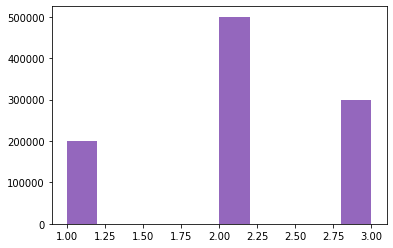

In [ ]:
N_span = [100 ,1000, 10000 ,100000, 1000000]
print('Theoretical prob: ', prob)

for N in N_span:
  X_sample = np.random.choice(elements, N, p=prob)
  print('With N=',N,', MLE of prob is : ', [count_nonzero(X_sample == 1)/N, count_nonzero(X_sample == 2)/N, count_nonzero(X_sample == 3)/N])
  hist(X_sample)  




# Continuous random variable
If $X\in \mb{R}$ is a real-valued quantity, it is a **Continuous random variable**. 
- cumulative distribution function of $X$ is 
\begin{align}
P(x)= \text{Pr}(X\le x)
\end{align}
cdf are monotonically non-decreasing functions. 

- probability density function or pdf as the derivative of the cdf
\begin{align}
p(x) =\frac{d}{dx}P(x)
\end{align}
Note 
   - $\text{Pr}(a< X\le b)=\int_{a}^b p(x)dx = P(b)-P(a)$.
   - $\int_{-\infty}^{+\infty} p(x)=1$. 

- **Expectation:** For continuous rv and discrete rv,
\begin{align}
\mb{E}[X]= \int_\c{X} xp(x)dx \qquad \mb{E}[X]= \sum_{x\in\c{X}} xp(x)
\end{align}
   - Expectation is a linear operator, $\mb{E}(aX+b) = a\mb{E}(X)+b$. 
   - If $X_1, \dots, X_n$ are independent, the expectation is 
   \begin{align}
   \mb{E}(\Pi_{i=1}^N X_i) = \Pi_{i=1}^N \mb{E}(X_i)
   \end{align}

   - Expectation of function $f(X)$ is $\mb{E}[f(X)]= \int_\c{X} f(x)p(x)dx $.


- **Variance:** a measure of the “spread” of a distribution, 
\begin{align}
\sigma^2=\mb{V}[X] = \mb{E}[(X-\mu)^2]= \int(x-\mu)^2p(x)dx = \mb{E}[X^2]-\mu^2
\end{align}  
So $\mb{E}[X^2]=\sigma^2+\mu^2$. 
   - **Standard deviation:** $\text{std}[X] = \sqrt{\mb{V}[X]}=\sigma$. 

   - $\mb{V}[aX+b] = a^2 \mb{V}[X]$ 

   - If $X_1, \dots, X_n$ are independent,  the variance of their sum is given by the sum of their variance, $\mb{V}[\sum_{i=1}^n X_i]= \sum_{i=1}^n \mb{V}[X_i]$. What is $\mb{V}[\Pi_{i=1}^n X_i]$?



## 3. Uniform distribution $U_{(a,b)}$ 
Uniform distribution on $(a,b)$, the pdf is $p(x;a,b) = \frac{\mb{1}_{ab}(x)}{b-a}$, where $\mb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise. 

## 4. Univariate Gaussian (normal) distribution
Say the random variable $X\sim \c{N}(x;\mu,\sigma^2)$. The pdf of Gaussian distribution is 
\begin{align}
\c{N}(x;\mu,\sigma^2)= \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]
\end{align}

- Important integrals
  - $\int_{-\infty}^{+\infty} \c{N}(x;\mu,\sigma^2) dx = 1.$ This ensures the pdf is normalized to 1. 
  - $\mb{E}[X]=\int_{-\infty}^{+\infty} x\c{N}(x;\mu,\sigma^2) dx=\mu$. The mean of Gaussian distribution is $\mu$.
  - $\mb{V}[X]=\mb{E}[(X-\mu)^2] = \sigma^2$. The mean of Gaussian distribution is $\sigma^2$.

- Properties of Gaussian distribution
  - If $Y=aX+b$, then $Y\sim\c{N}(a\mu+b, a^2\sigma^2)$.
  - If two independent Gaussian variables $X_1\sim \c{N}(\mu_1,\sigma_1^2)$ and $X_2\sim \c{N}(\mu_2,\sigma_2^2)$, then $Z=X_1+X_2 \sim \c{N}(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)$. 
- Why Gaussian distribution is so important?   

### MLE for Gaussian
Let $\c{D} = \{x_n\}_{n=1}^N$ be an i.i.d. sample of size $N$. Wecanestimate the parameters $\mm\theta = (\mu, \sigma^2)$ using MLE as follows. 
\begin{align}
l_N(\mm\theta)&= \sum_{n=1}^N \log \left[\left(\frac{1}{2\pi\sigma^2}\right)^{\frac{1}{2}}\exp\left(-\frac{1}{2\sigma^2}(x_n-\mu)^2\right)\right] \\
&=\frac{1}{2\sigma^2}\sum_{n=1}^N (x_n-\mu)^2 +\frac{N}{2}\log(2\pi\sigma^2)
\end{align}
- Solve for $\frac{\partial}{\partial \mu}l_N(\mm\theta)=0, \frac{\partial}{\partial \sigma^2}l_N(\mm\theta)=0$
\begin{align}
&\boxed{\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n = \bar x}\\
&\boxed{\hat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^N(x_n-\hat\mu)^2}
\end{align}



In [2]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

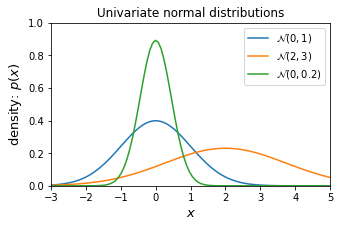

In [5]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
#fig.subplots_adjust(bottom=0.15)
plt.show()


In [8]:
# generate sample with size N
mu, sigma, N = 0, sqrt(2), 50000
x_sample = np.random.normal(mu, sigma, N)

# MLE of mu
mu_hat = np.mean(x_sample)

# MLE of sigma^2
sigma_square_hat  = np.sum( (x_sample-mu_hat)**2 ) / N    

print('Theoretical mu is: ', mu, ',sigma_square is:', sigma**2)
print('With N=',N,'MLE of mu is ', mu_hat, 'MLE of sigma_square', sigma_square_hat)


Theoretical mu is:  0 ,sigma_square is: 2.0000000000000004
With N= 50000 MLE of mu is  0.001683572507369195 MLE of sigma_square 2.0044747727082433


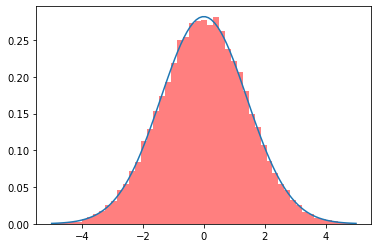

In [11]:
fig, ax = plt.subplots()
ax.hist(x_sample , 51, range=[-5,5], color='r', alpha=0.5,density=True);
x_span = np.linspace(-5,5,100)
plt.plot(
    x_span, univariate_normal(x_span, mean=0, variance=2), 
    label="$\mathcal{N}(0, 2)$")
plt.show()

# Maximum Likelihood Estimation 
- **Observe** the data $X_1, X_2, \dots, X_N$ drawn i.i.d. from the distribution $f(x;\theta)$ for some hidden variable $\theta=\theta_*$. 

- **Likelihood function (as variable of $\theta$):** $L_N(\theta)= \Pi_{i=1}^N f(X_i; \theta)$. 

- **Log-Likelihood function:** $l_N(\theta)=\log(L_N(\theta))=\sum_{i=1}^N \log(f(X_i;\theta)). $

- **Maximum Likelihood Estimator (MLE):** $\hat{\theta}_{\text{MLE}} =\arg\max_\theta L_N(\theta) =\arg\max_\theta l_N(\theta)$. 

These MLE $\hat{\theta}_{\text{MLE}}$ are also random variables. We can ask 
- $\mb{E}[\hat{\theta}_{\text{MLE}}]=?$ If $\mb{E}[\hat{\theta}_{\text{MLE}}]=\theta^*$, then MLE is called **unbiased**. 
- $\mb{V}[\hat{\theta}_{\text{MLE}}]=?$